# Neural Network using Numpy

Coordinate-based multilayer perceptron in numpy from scratch. For each input image coordinate $\mathbf{v}=(x,y)$, the model predicts the associated color $(r,g,b)$.

![Network diagram](https://user-images.githubusercontent.com/3310961/85066930-ad444580-b164-11ea-9cc0-17494679e71f.png)

You will then compare the following input feature mappings $\gamma (\mathbf{v})$.

- No mapping: $\gamma(\mathbf{v})= \mathbf{v}$. 

- Basic mapping: $\gamma(\mathbf{v})=\left[ \cos(2 \pi \mathbf{v}),\sin(2 \pi \mathbf{v}) \right]^\mathrm{T}$. 

- Gaussian Fourier feature mapping: $\gamma(\mathbf{v})= \left[ \cos(2 \pi \mathbf B \mathbf{v}), \sin(2 \pi \mathbf B \mathbf{v}) \right]^\mathrm{T}$, 
where each entry in $\mathbf B \in \mathbb R^{m \times d}$ is sampled from $\mathcal N(0,\sigma^2)$.

Some notes to help you with that:

- You will implement the mappings in the helper functions `get_B_dict` and `input_mapping`. 
- The basic mapping can be considered a case where $\mathbf B \in \mathbb R^{2 \times 2}$ is the identity matrix. 
- For this assignment, $d$ is 2 because the input coordinates in two dimensions. 
- You can experiment with $m$ and $\sigma$ values e.g. $m=256$ and $\sigma \in \{1, 10, 100\}$.

Source: https://bmild.github.io/fourfeat/ 
This assignment is inspired by and built off of the authors' demo. 

### Imports

In [16]:
import utils
import viz
from tqdm.notebook import tqdm
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Low Resolution Reconstruction

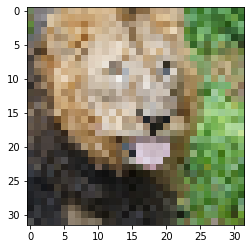

In [17]:
size = 32
train_data, test_data = viz.get_image(size)

#### Low Resolution Reconstruction - SGD - None Mapping

In [18]:
B_dict = utils.get_B_dict()
X_train, y_train, X_test, y_test = utils.get_input_features(B_dict["none"], train_data, test_data)

  0%|          | 0/1000 [00:00<?, ?it/s]

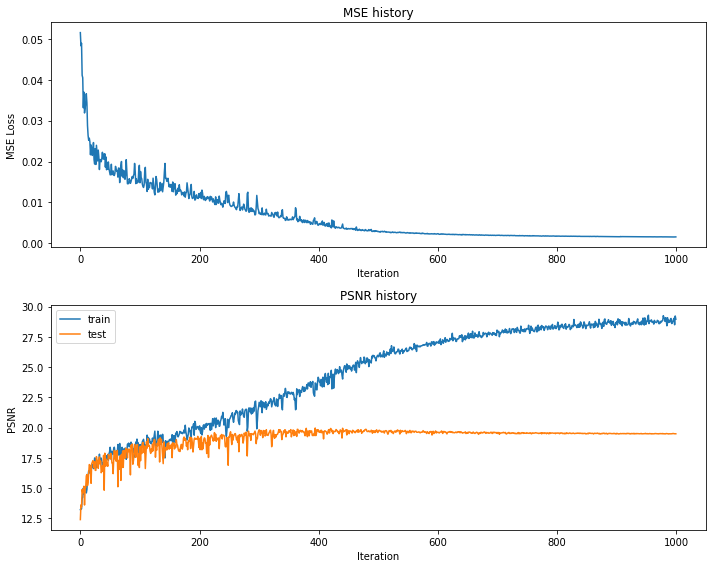

Final Test MSE 0.011257775264575462
Final Test psnr 19.48547425273343


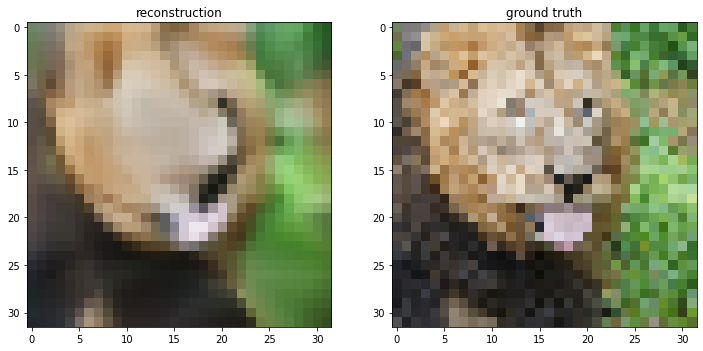

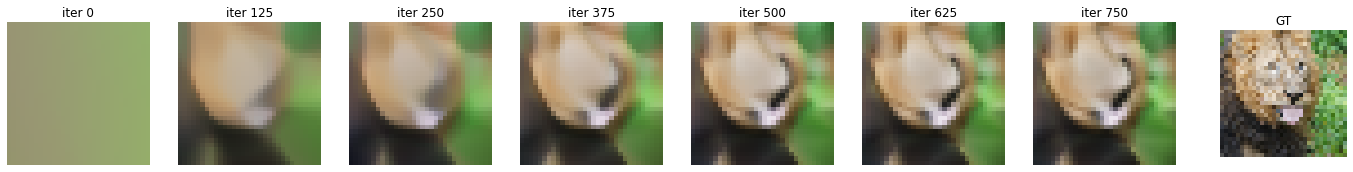

In [19]:
num_layers, hidden_size, epochs = 5, 256, 1000
learning_rate, formula, k = 10, "exp", 0.004
opt, batch_size = "SGD", 16
net, train_psnr, test_psnr, train_loss, predicted_images = utils.NN_experiment(X_train, y_train, X_test, y_test, num_layers,\
                                                                         hidden_size, epochs, learning_rate, formula, k,\
                                                                         opt, batch_size)
# plot results of experiment 
viz.plot_training_curves(train_loss, train_psnr, test_psnr)
viz.plot_reconstruction(net.forward(X_test), y_test)
viz.plot_reconstruction_progress(predicted_images, y_test)

#### Low Resolution Reconstruction - Adam - None Mapping

  0%|          | 0/1000 [00:00<?, ?it/s]

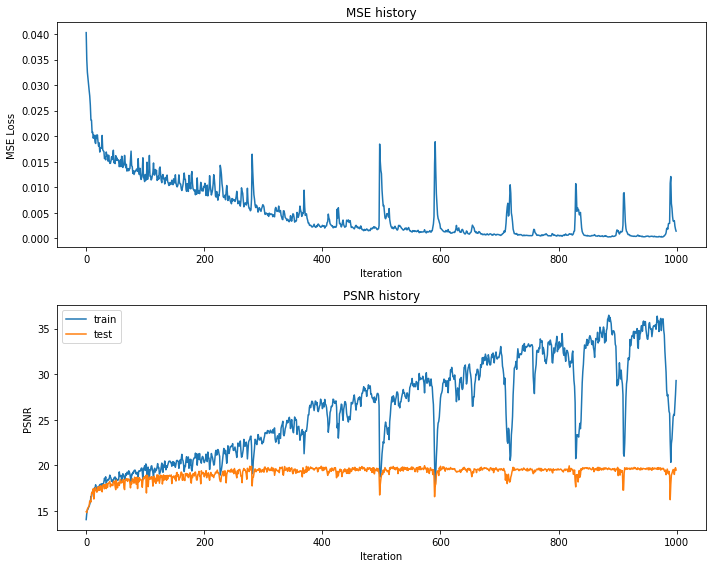

Final Test MSE 0.01123371839849651
Final Test psnr 19.494764670106957


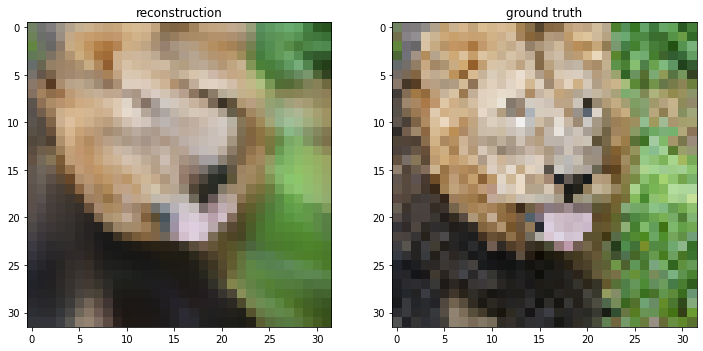

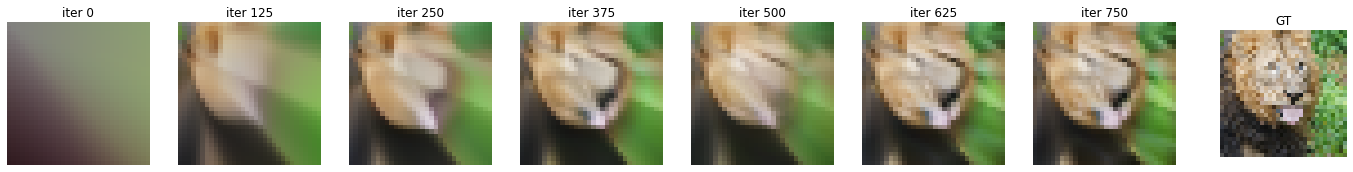

In [ ]:
num_layers, hidden_size, epochs = 5, 256, 1000
learning_rate, formula, k = 0.001, "none", 0.004
opt, batch_size = "Adam", 16
net, train_psnr, test_psnr, train_loss, predicted_images = utils.NN_experiment(X_train, y_train, X_test, y_test, num_layers,\
                                                                         hidden_size, epochs, learning_rate, formula, k,\
                                                                         opt, batch_size)
# plot results of experiment 
viz.plot_training_curves(train_loss, train_psnr, test_psnr)
viz.plot_reconstruction(net.forward(X_test), y_test)
viz.plot_reconstruction_progress(predicted_images, y_test)

#### Low Resolution Reconstruction - Optimizer of your Choice - Various Input Mapping Stategies

In [20]:
def train_wrapper(B, mapping, size, opt, epochs=1000, batch_size=16):
    X_train, y_train, X_test, y_test = utils.get_input_features(B[mapping], train_data, test_data)
    num_layers, hidden_size = 5, 256
    learning_rate, formula, k = 10, "exp", 0.004
    if (opt=="Adam"):
        learning_rate = 1e-3
    net, train_psnr, test_psnr, train_loss, predicted_images = utils.NN_experiment(X_train, y_train, X_test, y_test, num_layers,\
                                                                         hidden_size, epochs, learning_rate, formula, k,\
                                                                         opt, batch_size)
    return {
      'net': net, 
      'train_psnrs': train_psnr, 
      'test_psnrs': test_psnr,
      'train_loss': train_loss,
      'pred_imgs': predicted_images
    }

In [ ]:
outputs = {}
B_dict, size, opt = utils.get_B_dict(), 32, "Adam"
for map in tqdm(["none", "basic", "gauss_1.0", "gauss_10.0", "gauss_100.0"]):
    outputs[map] = train_wrapper(B_dict, map, size, opt)

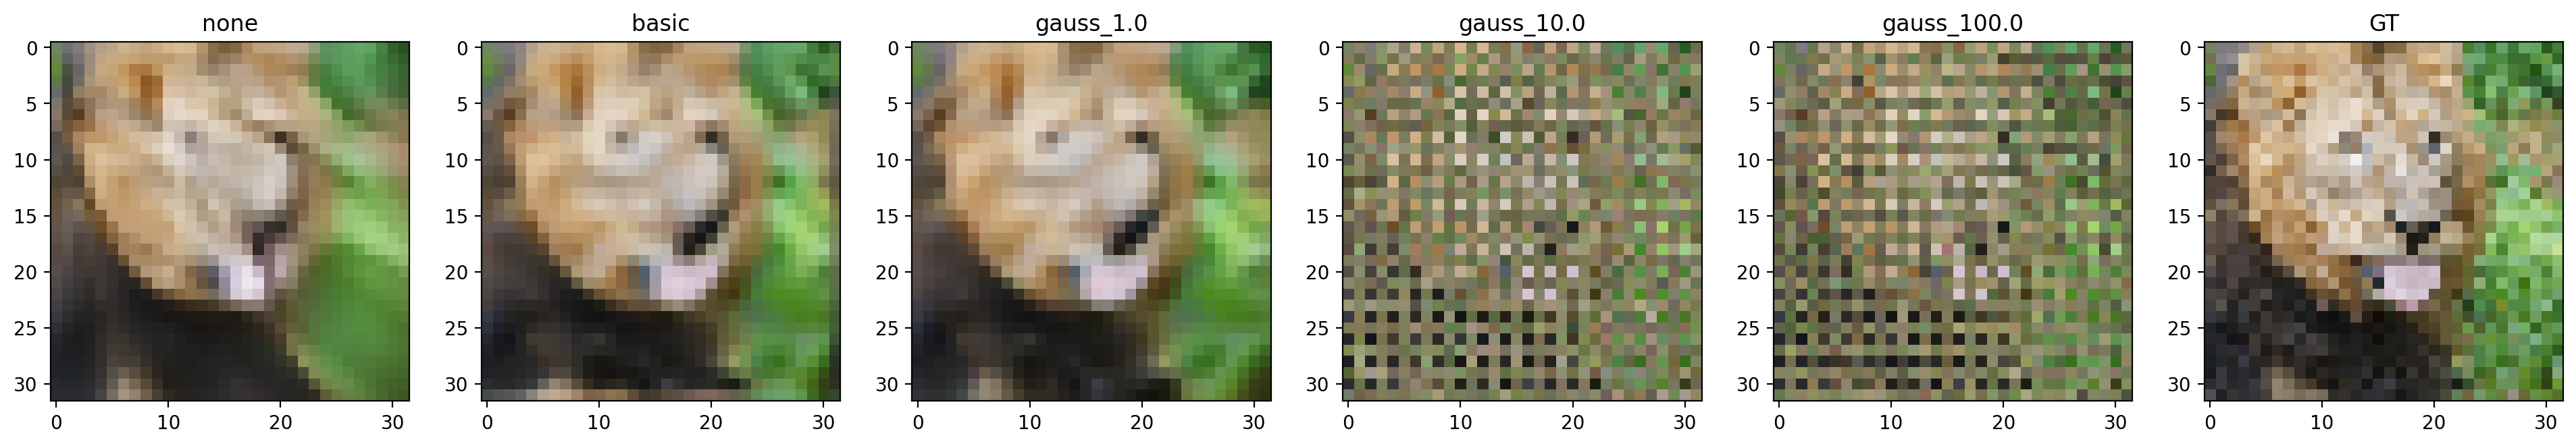

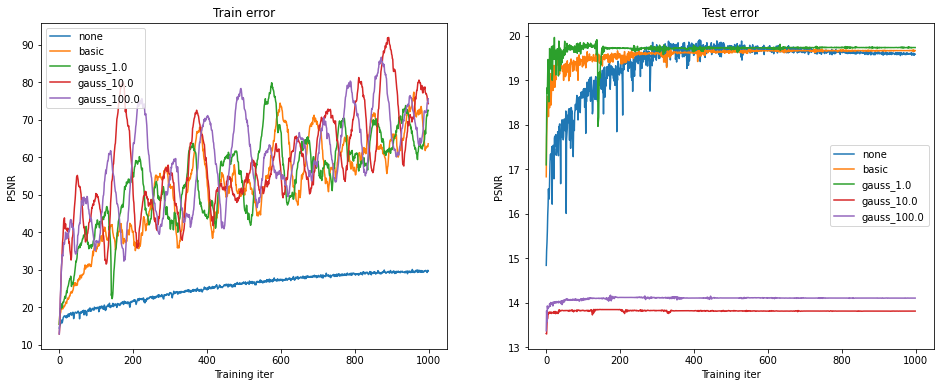

In [22]:
# if you did everything correctly so far, this should output a nice figure you can use in your report
X_train, y_train, X_test, y_test = utils.get_input_features(B_dict["gauss_100.0"], train_data, test_data)
viz.plot_feature_mapping_comparison(outputs, y_test.reshape(size,size,3))

In [ ]:
outputs = {}
B_dict, size, opt = utils.get_B_dict(), 32, "SGD"
for map in tqdm(["none", "basic", "gauss_1.0", "gauss_10.0", "gauss_100.0"]):
    outputs[map] = train_wrapper(B_dict, map, size, opt)

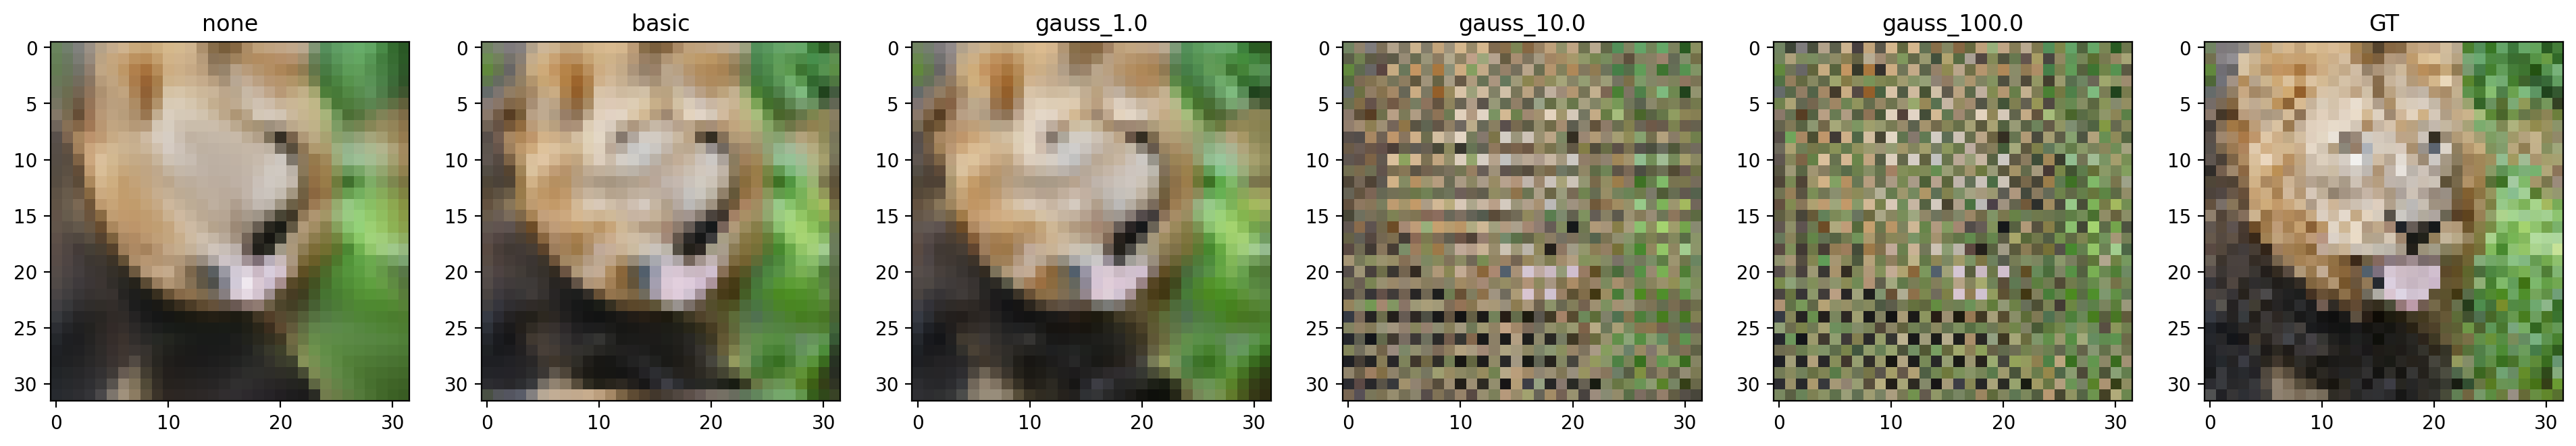

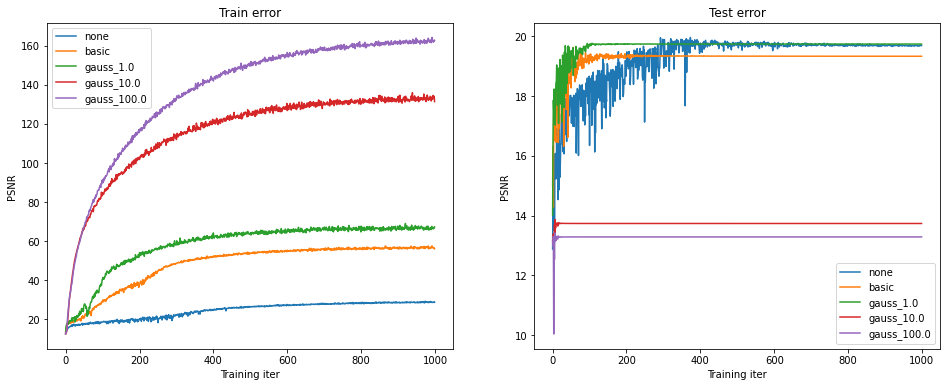

In [24]:
# if you did everything correctly so far, this should output a nice figure you can use in your report
X_train, y_train, X_test, y_test = utils.get_input_features(B_dict["gauss_100.0"], train_data, test_data)
viz.plot_feature_mapping_comparison(outputs, y_test.reshape(size,size,3))

# High Resolution Reconstruction

#### High Resolution Reconstruction - Optimizer of your Choice - Various Input Mapping Stategies

Repeat the previous experiment, but at the higher resolution. The reason why we have you first experiment with the lower resolution since it is faster to train and debug. Additionally, you will see how the mapping strategies perform better or worse at the two different input resolutions. 

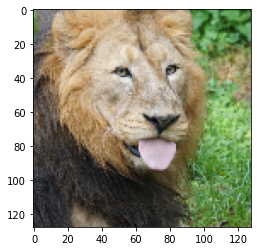

In [ ]:
size = 128
train_data, test_data = viz.get_image(size)

In [ ]:
outputs = {}
B_dict = utils.get_B_dict()
opt, epochs, batch_size = "Adam", 500, 32
for map in tqdm(["none", "basic", "gauss_1.0", "gauss_10.0", "gauss_100.0"]):
     outputs[map] = train_wrapper(B_dict, map, size, opt, epochs, batch_size)

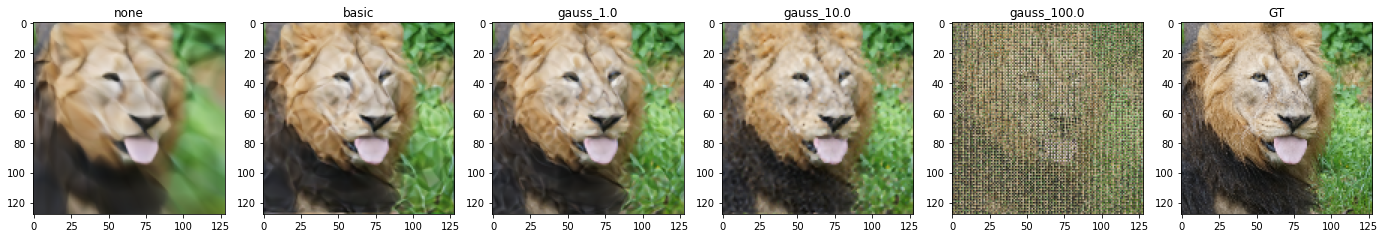

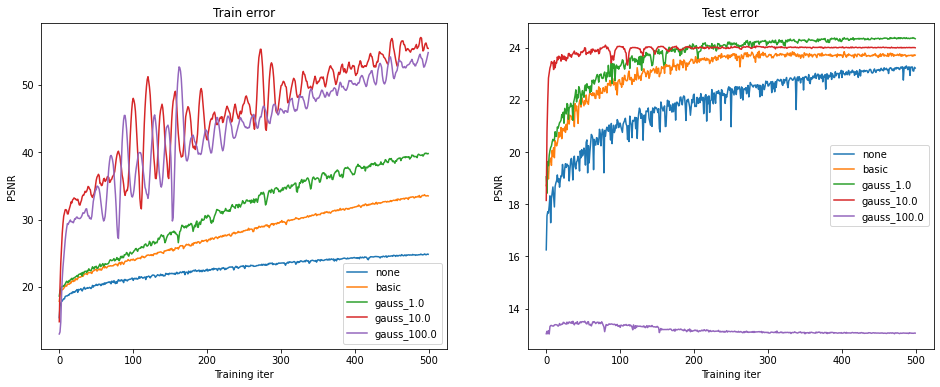

In [ ]:
# if you did everything correctly so far, this should output a nice figure you can use in your report
X_train, y_train, X_test, y_test = utils.get_input_features(B_dict["gauss_100.0"], train_data, test_data)
viz.plot_feature_mapping_comparison(outputs, y_test.reshape(size,size,3))

#### High Resolution Reconstruction - Image of your Choice

When choosing an image select one that you think will give you interesting results or a better insight into the performance of different feature mappings and explain why in your report template. 

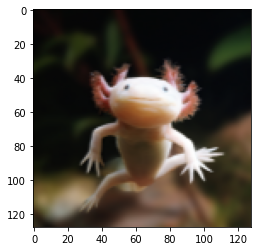

In [ ]:
size = 128
# TODO pick an image and replace the url string
train_data, test_data = viz.get_image(size, image_url="./ownimage.png")

In [ ]:
outputs = {}
B_dict = utils.get_B_dict()
opt, epochs, batch_size = "Adam", 500, 32
for map in tqdm(["none", "basic", "gauss_1.0", "gauss_10.0", "gauss_100.0"]):
     outputs[map] = train_wrapper(B_dict, map, size, opt, epochs, batch_size)

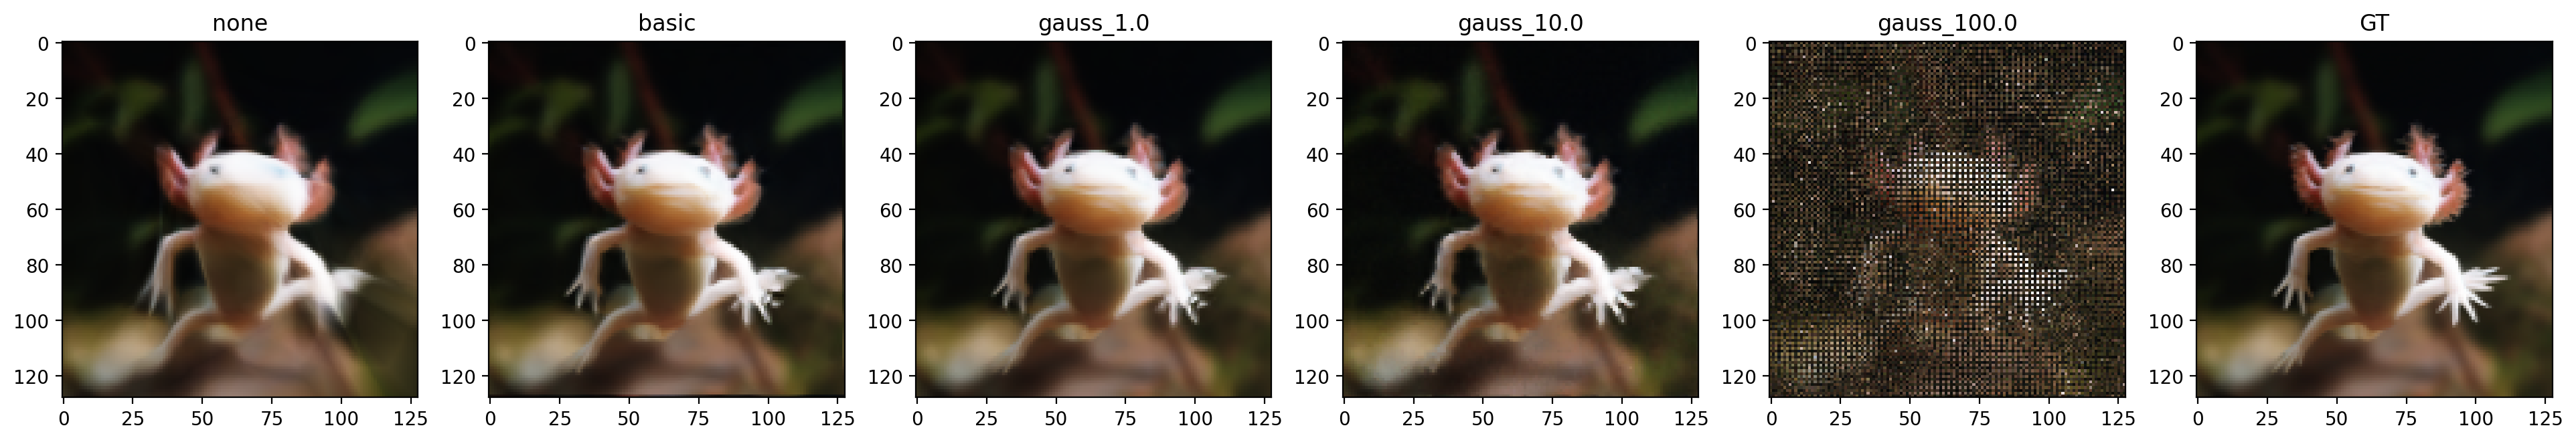

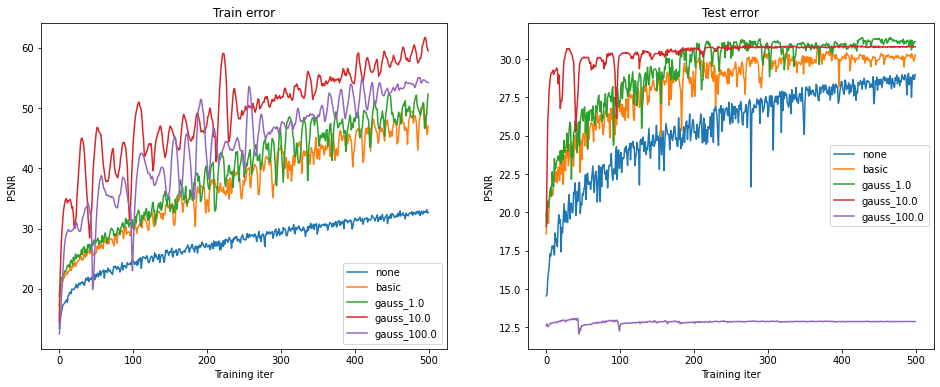

In [ ]:
# if you did everything correctly so far, this should output a nice figure you can use in your report
X_train, y_train, X_test, y_test = utils.get_input_features(B_dict["gauss_100.0"], train_data, test_data)
viz.plot_feature_mapping_comparison(outputs, y_test.reshape(size,size,3))

# Reconstruction Process Video (Optional)
(For Fun!) Visualize the progress of training in a video 

In [ ]:
# single video example
predicted_images = outputs["gauss_1.0"]["pred_imgs"]
viz.create_and_visualize_video({"gauss": {"pred_imgs": predicted_images}}, filename="training_high_res_gauss.mp4", size=128)

In [ ]:
# multi video example
viz.create_and_visualize_video(outputs, epochs=500, size=128)

,,,,
none,basic,gauss_1.0,gauss_10.0,gauss_100.0
